# Calibração do termistor

In [7]:
using Plots
gr()


Plots.GRBackend()

In [8]:
include("../src/ThermistorHW.jl")
using ThermistorHW

In [5]:
Tc = [0.0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60.5, 70.3, 75, 80, 85, 90]
R1 = [14.11, 11.66, 9.44, 7.75, 6.37, 5.28, 4.4, 3.7, 3.09, 2.21, 1.561, 1.118, 0.961, 0.817, 0.701, 0.602]
R2 = [13.92, 11.63, 9.51, 7.73, 6.36, 5.26, 4.41, 3.69, 3.08, 2.20, 1.553, 1.115, 0.954, 0.815, 0.697, 0.6]
R3 = [13.70, 11.42, 9.16, 7.48, 6.16, 5.09, 4.29, 3.58, 3.01, 2.12, 1.503, 1.083, 0.922, 0.791, 0.674, 0.583];

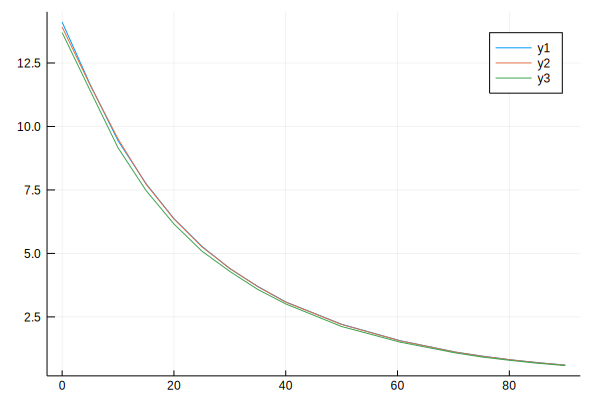

In [6]:
plot(Tc, R1)
plot!(Tc, R2)
plot!(Tc, R3)

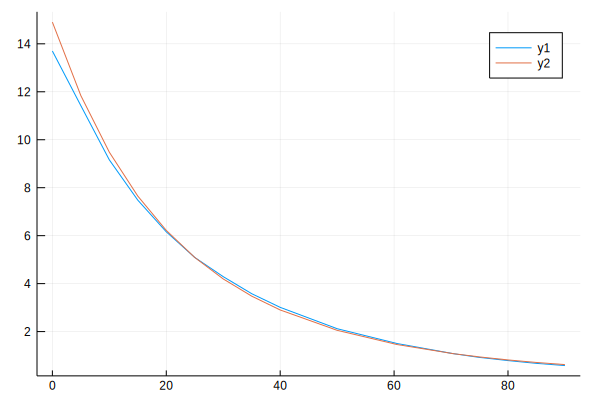

In [60]:
Rt1 = Thermistor(5.28, 3500, 25)
Rt2 = Thermistor(5.26, 3500, 25)
Rt3 = Thermistor(5.09, 3500, 25)
plot(Tc, R3)
plot!(Tc, Rt3.(Tc))

In [17]:
using CurveFit

INFO: Precompiling module Polynomials.


In [64]:
T0 = Rt1.T₀
oot0 = 1/T0
Tk = Tc .+ 273.15
oot = 1./Tk;
lnR1 = log.(R1)
lnR2 = log.(R2)
lnR3 = log.(R3)
fit1 = linear_fit(oot[6:10], lnR1[6:10])
fit2 = linear_fit(oot[6:10], lnR2[6:10])
fit3 = linear_fit(oot[6:10], lnR3[6:10])

B = [fit1[2], fit2[2], fit3[2]]
A = [fit1[1], fit2[1], fit3[1]]
R0 = @. exp(A+B/T0)

3-element Array{Float64,1}:
 5.2996 
 5.29409
 5.14457

In [65]:
B

3-element Array{Float64,1}:
 3359.79
 3371.44
 3384.27

In [28]:
Rt = Thermistor.(R0, B, 25.0)

3-element Array{ThermistorHW.Thermistor,1}:
 ThermistorHW.Thermistor(5.17684, 3483.47, 298.15)
 ThermistorHW.Thermistor(5.16175, 3485.29, 298.15)
 ThermistorHW.Thermistor(5.01699, 3492.93, 298.15)

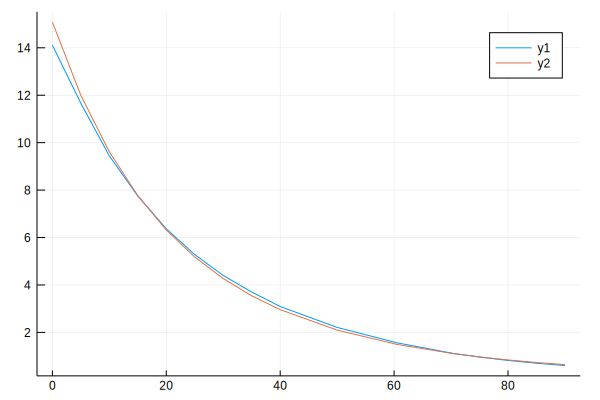

In [31]:
plot(Tc, R1)
plot!(Tc, Rt[1].(Tc))

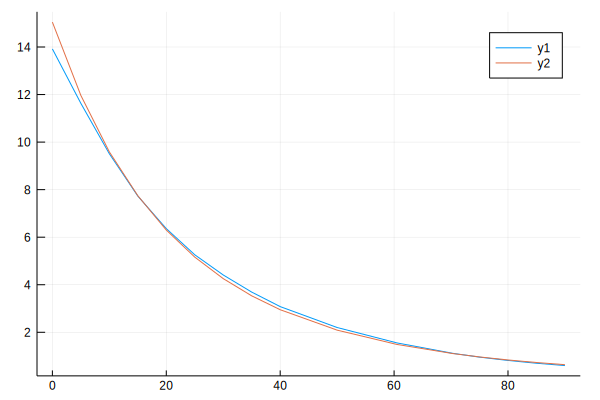

In [32]:
plot(Tc, R2)
plot!(Tc, Rt[2].(Tc))

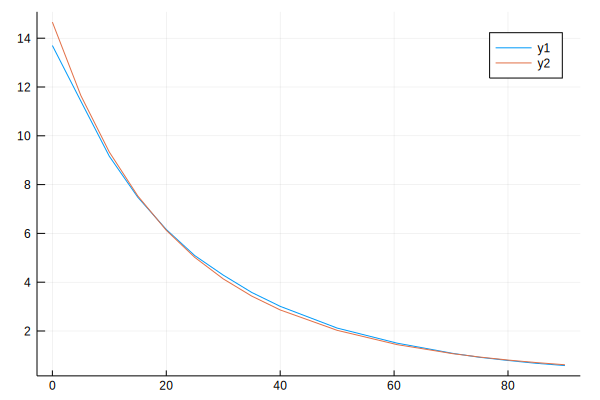

In [33]:
plot(Tc, R3)
plot!(Tc, Rt[3].(Tc))

In [38]:
err1 = (Rt[1].(Tc) - R1) ./ R1 * 100
err2 = (Rt[2].(Tc) - R2) ./ R2 * 100
err2 = (Rt[3].(Tc) - R3) ./ R3 * 100




16-element Array{Float64,1}:
  7.0023  
  2.00392 
  1.87848 
  0.719487
 -0.541312
 -1.43434 
 -3.60185 
 -4.18163 
 -4.90362 
 -4.39316 
 -4.02991 
 -1.20504 
  1.1592  
  2.29849 
  4.57255 
  5.70421 

In [45]:
Ro = [5.28, 5.26, 5.01] 

fator =(Tk*T0) ./(Tk - T0)

B1 = fator .* log.(R1/Ro[1])
B2 = fator .* log.(R2/Ro[2])
B3 = fator .* log.(R3/Ro[3])
[B1 B2 B3]

16×3 Array{Float64,2}:
 -3202.07  -3170.27  -3277.0 
 -3285.03  -3290.09  -3416.44
 -3270.08  -3333.02  -3396.04
 -3297.01  -3307.42  -3443.32
 -3280.63  -3319.51  -3612.19
   NaN       NaN       Inf   
 -3295.8   -3186.16  -2804.61
 -3267.01  -3257.01  -3087.67
 -3334.74  -3331.3   -3171.29
 -3356.48  -3359.33  -3314.42
 -3414.75  -3418.51  -3373.76
 -3509.13  -3506.63  -3462.38
 -3536.93  -3544.23  -3513.96
 -3572.34  -3569.77  -3533.77
 -3593.54  -3596.97  -3570.02
 -3617.03  -3616.25  -3583.02

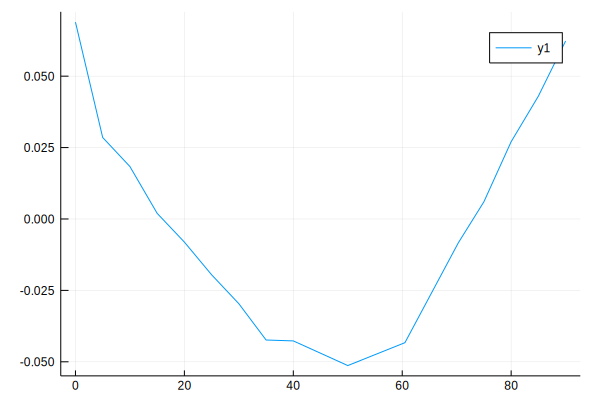

In [62]:
plot(Tc, (Rt[1].(Tc) - R1)./R1)

In [63]:
B

3-element Array{Float64,1}:
 3483.47
 3485.29
 3492.93